# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [88]:
# Your code here. 
import pandas as pd
import numpy as np

Age = [17,51,27,21,36,48,19,26,54,30]
Tardies = [10,1,5,9,4,2,9,6,0,3]

student_data = pd.DataFrame({'Age': Age, 'Tardies': Tardies})
student_data 

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

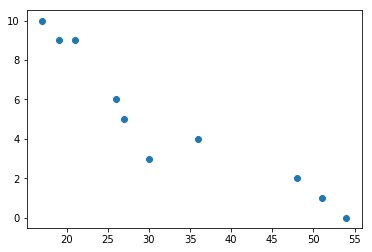

In [89]:
# Your code here.
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(student_data.Age,student_data.Tardies)

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [2]:
# Your response here. 
# Yes, it does look like that the older the students are, the less tardies they have.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [94]:
# Your response here.
# covariance:
student_data[['Age','Tardies']].cov()

# Covariance is a measure of relationship between 2 variables. It measures the degree of change in the variables, 
# i.e. when one variable changes, will there be the same/a similar change in the other variable.
# The issue with covariance is that it requires both variables to be measured on the same scale to get some 
# meaning, i.e. covariance is not standardized and it’s interpretation is scale dependent. 
# One cannot easily compare different covariance measurements unless the variables are all on the same scale. 

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


In [95]:
# correlation:
student_data[['Age','Tardies']].corr()

# Correlation of -0.939163 tells us that there's a really strong negative correlation between the two variables.


,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [96]:
from scipy.stats import linregress 
slope, intercept, r_value, p_value, std_err = linregress(student_data.Age, student_data.Tardies)
print(slope, intercept, r_value, p_value, std_err)

-0.24282077091598084 12.88880336313577 -0.9391626886887123 5.56665383455336e-05 0.03139728816158602


In [107]:
# Your response here.
import statsmodels.api as sm

X = sm.add_constant(student_data.Age)
Y = student_data.Tardies

model = sm.OLS(Y, X)
results= model.fit()

print_model = results.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Tue, 17 Sep 2019   Prob (F-statistic):           5.57e-05
Time:                        22:24:39   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8888      1.111     11.605      0.0

/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


Plot your regression model on your scatter plot.

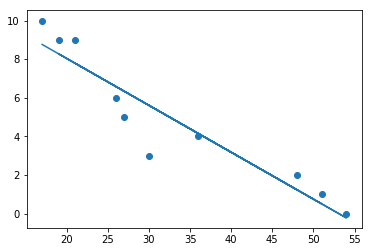

In [109]:
# Your code here.
plt.scatter(student_data.Age,student_data.Tardies)

# add the regression model line:
plt.plot(student_data.Age, results.predict(x))

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [3]:
# Your response here. 
# There certainly is a certain correlation between age and the tardiness. Most of the values are close to 
# the regression line; however there are some outliers and therefore we cannot say that the correlation is 
# certain.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [24]:
# Import any libraries you may need & the data
vehicles = pd.read_csv('./Vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [57]:
# Your response here. 
vehicles.corr()['CO2 Emission Grams/Mile']


Year                      -0.222300
Engine Displacement        0.803520
Cylinders                  0.752393
Fuel Barrels/Year          0.986189
City MPG                  -0.894139
Highway MPG               -0.926405
Combined MPG              -0.926229
CO2 Emission Grams/Mile    1.000000
Fuel Cost/Year             0.930865
Name: CO2 Emission Grams/Mile, dtype: float64

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [99]:
# Your response here. 
X = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
Y = vehicles['CO2 Emission Grams/Mile']

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.999
Model:                                 OLS   Adj. R-squared:                  0.999
Method:                      Least Squares   F-statistic:                 6.092e+06
Date:                     Tue, 17 Sep 2019   Prob (F-statistic):               0.00
Time:                             22:19:06   Log-Likelihood:            -1.5250e+05
No. Observations:                    35952   AIC:                         3.050e+05
Df Residuals:                        35947   BIC:                         3.050e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [110]:
# F test of overall significance + p value : does the overall model have any predictive value ?

# Adjusted. R-squared reflects the fit of the model. R-squared values range from 0 to 1, where a 
# higher value generally indicates a better fit, assuming certain conditions are met. 

# Coef of each variable represents the change in the output Y due to a change of one unit in the x 
# variable (everything else held constant)

# Std err reflects the level of accuracy of the coefficients. The lower it is, the higher is the level of 
# accuracy.

# P >|t| is the p-value. A p-value of less than 0.05 is considered to be statistically significant.

# Confidence Interval represents the range in which our coefficients are likely to fall (with a likelihood of 95%)

In [111]:
# Your response here.

# Adjusted. R-squared is 0.999, so model is a good fit.

# All variables have small p-values. Reject null hypothesis for all. There's association between each of these
# variables and CO2 Emission Grams/Mile.

# Year, Cylinders, Fuel Barrels/Year, Fuel Cost/Year are all positively associated with CO2 Emission Grams/Mile.
# Combined MPG is negatively associtated with CO2 Emission Grams/Mile.
 

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [7]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [1]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 